<a href="https://colab.research.google.com/github/fran-scala/ML_course_Pavia_23/blob/main/python_advance/pandas_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

Based on [Python Pandas Tutorial A Complete Introduction for Beginners](https://github.com/LearnDataSci/articles/blob/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/notebook.ipynb).

[**Pandas**](https://github.com/pandas-dev/pandas) is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008.

In [1]:
import pandas as pd
print(pd.__version__) 

1.5.3


## Core components: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`.

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of `Series`. They are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean. In the following we focus on `DataFrame` objects.

### Creating DataFrame from scratch

There are many ways to create a `DataFrame` from scratch, but a great option is to just use a simple python `dict` and then pass it to the `DataFrame` constructor:

In [3]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data)
df

,calories,duration
0,420,50
1,380,40
2,390,45


Each *(key, value)* item in `data dict` corresponds to a column in the resulting `DataFrame`. The **index** of this `DataFrame` was given to us on creation as the numbers `0-3`, but we could also create our own when we initialize the `DataFrame`. Let's have customer names as our `index`:

In [4]:
df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
df

,calories,duration
day1,420,50
day2,380,40
day3,390,45


The `DataFrame` object uses the `loc` attribute to return one or more specified row(s) using the row index name (or number):

In [5]:
#return row "day2"
df.loc["day2"]

calories    380
duration     40
Name: day2, dtype: int64

In [6]:
#return row "day1" and "day3"
df.loc[["day1","day3"]]

,calories,duration
day1,420,50
day3,390,45


## Read data

It’s quite simple to load data from various file formats into a DataFrame. 

### From CSV and JSON Files

A simple way to store big data sets is to use CSV files (comma separated files).
CSV files contains plain text and is a well know format that can be read by everyone including Pandas. In our examples we will be using a CSV file called [`data.csv`](https://github.com/jngadiub/ML_course_Pavia_23/blob/main/python_advance/data.csv).

In [7]:
#fetch file from git
!curl https://raw.githubusercontent.com/jngadiub/ML_course_Pavia_23/main/python_advance/data.csv -o data.csv
!head data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2859  100  2859    0     0  34035      0 --:--:-- --:--:-- --:--:-- 34035
Duration,Pulse,Maxpulse,Calories
60,110,130,409.1
60,117,145,479.0
60,103,135,340.0
45,109,175,282.4
45,117,148,406.0
60,102,127,300.0
60,110,136,374.0
45,104,134,253.3
30,109,133,195.1


In [11]:
#load in DataFrame
df = pd.read_csv('data.csv')
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


If you have a large `DataFrame` with many rows, Pandas will only return the first 5 rows, and the last 5 rows as above. To print the entire DF you can use the method `to_string()`:

In [12]:
print(df.to_string())

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
17         45     90       112       NaN
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45   

Big data sets are often stored, or extracted as `JSON`. It is plain text, but has the format of an object, and is well known in the world of programming, including Pandas. In our examples we will be using a `JSON` file called `data.json`.

In [13]:
#fetch file from git
!curl https://raw.githubusercontent.com/jngadiub/ML_course_Pavia_23/main/python_advance/data.json -o data.json
!head data.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9917  100  9917    0     0   345k      0 --:--:-- --:--:-- --:--:--  345k
{
  "Duration":{
    "0":60,
    "1":60,
    "2":60,
    "3":45,
    "4":45,
    "5":60,
    "6":60,
    "7":45,


In [15]:
#load in DF
df = pd.read_json('data.json')
print(df.to_string()) 

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.5
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
17         45     90       112       NaN
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45   

If your `JSON` object is not in a file, but in a Python Dictionary, you can load it into a `DataFrame` directly:

In [16]:
data = {
  "Duration":{
    "0":60,
    "1":60,
    "2":60,
    "3":45,
    "4":45,
    "5":60
  },
  "Pulse":{
    "0":110,
    "1":117,
    "2":103,
    "3":109,
    "4":117,
    "5":102
  },
  "Maxpulse":{
    "0":130,
    "1":145,
    "2":135,
    "3":175,
    "4":148,
    "5":127
  },
  "Calories":{
    "0":409,
    "1":479,
    "2":340,
    "3":282,
    "4":406,
    "5":300
  }
}

df = pd.DataFrame(data)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409
1,60,117,145,479
2,60,103,135,340
3,45,109,175,282
4,45,117,148,406
5,60,102,127,300


### Convert back to CSV and JSON file

So after extensive work on cleaning your data, you’re now ready to save it as a file of your choice. Similar to the ways we read in data, Pandas provides intuitive commands to save it:

In [17]:
df.to_csv('new_data.csv')
df.to_json('new_data.json')
!ls

data.csv  data.json  new_data.csv  new_data.json  sample_data


## Important DataFrame operations

DataFrames possess hundreds of methods and other operations that are crucial to any analysis. As a beginner, you should know the operations that perform simple transformations of your data and those that provide fundamental statistical analysis.

Let's load in the IMDB movies dataset and designate the movie titles to be our index:

In [18]:
#fetch csv movie file from git
!curl https://raw.githubusercontent.com/jngadiub/ML_course_Pavia_23/main/python_advance/IMDB-Movie-Data.csv -o IMDB-Movie-Data.csv
!head IMDB-Movie-Data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  302k  100  302k    0     0  2800k      0 --:--:-- --:--:-- --:--:-- 2800k
Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7,485820,126.46,65
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct pe

In [20]:
#load into DF
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")
movies_basic = pd.read_csv("IMDB-Movie-Data.csv")

### Viewing the data

The first thing to do when opening a new dataset is print out a few rows to keep as a visual reference. We accomplish this with `head()`:


In [21]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [22]:
movies_basic.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


The `head()` method outputs the first five rows of your `DataFrame` by default, but we could also pass a number as well: `movies_df.head(10)` would output the top ten rows, for example.

To see the last five rows use `tail()`. It also accepts a number, and in this case we printing the bottom two rows:

In [ ]:
movies_df.tail(2)

Typically when we load in a dataset, we like to view the first five or so rows to see what's under the hood. Here we can see the names of each column, the index, and examples of values in each row.

You'll notice that the index in our `DataFrame` is the *Title* column, which you can tell by how the word *Title* is slightly lower than the rest of the columns headers.


### Getting info about the data

The `info()` should be one of the very first commands you run after loading your data:

In [23]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


The `info()` method provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your `DataFrame` is using.

Notice in our movies dataset we have some obvious missing values in the *Revenue* and *Metascore* columns. We'll look at how to handle those below.

Seeing the datatype quickly is actually quite useful. Imagine you just imported some JSON and the integers were recorded as strings. You go to do some arithmetic and find an *unsupported operand exception* because you can't do math with strings. Calling `info()` will quickly point out that your column you thought was all integers are actually string objects.

Another fast and useful attribute is `shape`, which outputs just a tuple of (rows, columns):


In [24]:
movies_df.shape

(1000, 11)

### Handling duplicates

This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows.

To demonstrate, let's simply just double up our movies DataFrame by appending it to itself:

In [25]:
temp_df = movies_df.append(movies_df)
temp_df.shape

<ipython-input-25-d4b8ad720ee5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = movies_df.append(movies_df)


(2000, 11)

Using `append()` will return a copy without affecting the original `DataFrame`. We are capturing this copy in temp so we aren't working with the real data. Notice call `shape` quickly proves our `DataFrame` rows have doubled.

Now we can try dropping duplicates:

In [26]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(1000, 11)

Just like `append()`, the `drop_duplicates()` method will also return a copy of your `DataFrame`, but this time with duplicates removed. Calling `shape` confirms we're back to the `1000` rows of our original dataset.

It's a little verbose to keep assigning `DataFrames` to the same variable like in this example. For this reason, Pandas has the inplace keyword argument on many of its methods. Using `inplace=True` will modify the `DataFrame` object in place:


In [ ]:
temp_df = movies_df.append(movies_df) # make a new copy
temp_df.drop_duplicates(inplace=True)
temp_df.shape

Now our `temp_df` will have the transformed data automatically.

Another important argument for `drop_duplicates()` is `keep`, which has three possible options:

* `first`: (default) Drop duplicates except for the first occurrence.
* `last`: Drop duplicates except for the last occurrence.
* `False`: Drop all duplicates.

Since we didn't define the `keep` arugment in the previous example it was defaulted to `first`. This means that if two rows are the same pandas will drop the second row and keep the first row. Using `last` has the opposite effect: the first row is dropped. `False`, on the other hand, will drop all duplicates. If two rows are the same then both will be dropped. Example:


In [27]:
temp_df = movies_df.append(movies_df)  # make a new copy
temp_df.drop_duplicates(inplace=True, keep=False)
temp_df.shape

<ipython-input-27-69c8ac13e2ba>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = movies_df.append(movies_df)  # make a new copy


(0, 11)

Since all rows were duplicates, `keep=False` dropped them all resulting in zero rows being left over. If you're wondering why you would want to do this, one reason is that it allows you to locate all duplicates in your dataset. When conditional selections are shown below you'll see how to do that.

### Column cleanup

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

Here's how to print the column names of our dataset:

In [28]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Not only does the attribute `columns` come in handy if you want to rename columns by allowing for simple copy and paste, it's also useful if you need to understand why you are receiving a `Key Error` when selecting data by column.

We can use the `rename()` method to rename certain or all columns via a `dict`. We don't want parentheses, so let's rename those:


In [30]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

What if we want to lowercase all names? Instead of using `rename()` we could also set a list of names to the columns:

In [36]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

Faster approach: instead of just renaming each column manually we can do a list comprehension:


In [37]:
#Reload original
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

#remove parentheses
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)

#change to lower case in column headers
movies_df.columns = [col.lower() for col in movies_df]

#check result
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

### Missing values

When exploring data, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's `None` or NumPy's `np.nan`, each of which are handled differently in some situations.

There are two options in dealing with nulls:

* Get rid of rows or columns with nulls
* Replace nulls with non-null values, a technique known as **imputation**

Let's calculate to total number of nulls in each column of our dataset. The first step is to check which cells in our `DataFrame` are null:

In [38]:
movies_df.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


Notice `isnull()` returns a `DataFrame` where each cell is either `True` or `False` depending on that cell's null status.

To count the number of nulls in each column we use an aggregate function for summing:


In [39]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

The `isnull()` method just by iteself isn't very useful, and is usually used in conjunction with other methods, like `sum()`.

We can see now that our data has `128` missing values for `revenue_millions` and `64` missing values for metascore.


#### Remove null values

Data Scientists and Analysts regularly face the dilemma of dropping or imputing null values, and is a decision that requires intimate knowledge of your data and its context. Overall, removing null data is only suggested if you have a small amount of missing data.

Remove nulls is pretty simple:


In [40]:
temp_df = movies_df.dropna()
temp_df.isnull().sum()

rank                0
genre               0
description         0
director            0
actors              0
year                0
runtime             0
rating              0
votes               0
revenue_millions    0
metascore           0
dtype: int64

This operation will delete any row with at least a single null value, but it will return a new `DataFrame` without altering the original one. You could specify `inplace=True` in this method as well.

So in the case of our dataset, this operation would remove `128` rows where `revenue_millions` is null and `64` rows where `metascore` is null. This obviously seems like a waste since there's perfectly good data in the other columns of those dropped rows. That's why we'll look at *imputation* next.

Other than just dropping rows, you can also drop columns with null values by setting `axis=1`:


In [41]:
temp_df = movies_df.dropna(axis=1)
temp_df.shape

(1000, 9)

#### Imputation

*Imputation* is a conventional feature engineering technique used to keep valuable data that have null values. There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the mean or the median of that column.

Let's look at imputing the missing values in the `revenue_millions` column. First we'll extract that column into its own variable:


In [42]:
revenue = movies_df['revenue_millions']
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

We'll impute the missing values of revenue using the mean. Here's the mean value:

In [43]:
revenue_mean = revenue.mean()
revenue_mean

82.95637614678898

Let's fill the nulls with the mean using `fillna()`:

In [44]:
revenue.fillna(revenue_mean, inplace=True)

We have now replaced all nulls in `revenue` with the mean of the column. Notice that by using `inplace=True` we have actually affected the original `movies_df`:


In [45]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

Imputing an entire column with the same value like this is a basic example. It would be a better idea to try a more granular imputation by `Genre` or `Director`.

For example, you would find the mean of the revenue generated in each genre individually and impute the nulls in each genre with that genre's mean.

Let's now look at more ways to examine and understand the dataset.


### Retrieve data statistics

Using `describe()` on an entire `DataFrame` we can get a summary of the distribution of continuous variables:

In [46]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Understanding which numbers are continuous also comes in handy when thinking about the type of plot to use to represent your data visually.

The `describe()` method can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category:


In [51]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

This tells us that the genre column has `207` unique values, the top value is Action/Adventure/Sci-Fi, which shows up `50` times (freq).

The `value_counts()` method can tell us the frequency of all values in a column:


In [53]:
movies_df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

#### Relationships between continuous variables

By using the correlation method `corr()` we can generate the relationship between each continuous variable:


In [54]:
movies_df.corr()

<ipython-input-54-9a612e800c6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies_df.corr()


,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


Correlation tables are a numerical representation of the bivariate relationships in the dataset.

Positive numbers indicate a positive correlation — one goes up the other goes up — and negative numbers represent an inverse correlation — one goes up the other goes down. `1.0` indicates a perfect correlation.

So looking in the first row, first column we see `rank` has a perfect correlation with itself, which is obvious. On the other hand, the correlation between `votes` and `revenue_millions` is `0.6`. A little more interesting.

Examining bivariate relationships comes in handy when you have an outcome or dependent variable in mind and would like to see the features most correlated to the increase or decrease of the outcome. You can visually represent bivariate relationships with scatterplots (seen below in the plotting section).

### DataFrame slicing, selecting, extracting

Up until now we've focused on some basic summaries of our data. We've learned about simple column extraction using single brackets, and we imputed null values in a column using `fillna()`. Below are the other methods of slicing, selecting, and extracting you'll need to use constantly.

It's important to note that, although many methods are the same, `DataFrames` and `Series` have different attributes, so you'll need be sure to know which type you are working with or else you will receive attribute errors.



#### By column

You already saw how to extract a column using square brackets like this:

In [55]:
genre_col = movies_df['genre']
type(genre_col)

pandas.core.series.Series

This will return a `Series`. To extract a column as a `DataFrame`, you need to pass a list of column names. In our case that's just a single column:


In [64]:
genre_col = movies_df[['genre']]
type(genre_col)


pandas.core.frame.DataFrame

Since it's just a list, adding another column name is easy:

In [57]:
subset = movies_df[['genre', 'rating']]
subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


#### By row

For rows, we have two options:

* `loc` - locates by name
* `iloc` - locates by numerical index

Remember that we are still indexed by movie *Title*, so to use `loc` we give it the *Title* of a movie:


In [58]:
prom = movies_df.loc["Prometheus"]
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

On the other hand, with `iloc` we give it the numerical index of *Prometheus*:

In [59]:
prom = movies_df.iloc[1]
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

The methods `loc` and `iloc` can be thought of as similar to Python list slicing. To show this even further, let's select multiple rows.

How would you do it with a list? In Python, just slice with brackets like `example_list[1:4]`. It's works the same way in Pandas:


In [60]:
#by name index
movie_subset = movies_df.loc['Prometheus':'Sing']
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [65]:
#by numerical index
movie_subset = movies_df.iloc[1:4]
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


#### Conditional selections

We’ve gone over how to select columns and rows, but what if we want to make a conditional selection?

For example, what if we want to filter our movies `DataFrame` to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the `DataFrame` and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [66]:
condition = (movies_df['director'] == "Ridley Scott")
condition.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

Similar to `isnull()`, this returns a `Series` of `True` and `False` values: `True` for films directed by Ridley Scott and `False` for ones not directed by him.

We want to filter out all movies directed by Ridley Scott, in other words, we don’t want the `False` films. To return the rows where that condition is `True` we have to pass this operation into the `DataFrame`:


In [67]:
movies_df[movies_df['director'] == "Ridley Scott"].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


Let's look at conditional selections using numerical values by filtering the `DataFrame` by ratings:

In [ ]:
movies_df[movies_df['rating'] >= 8.6].head(3)

We can make some richer conditionals by using logical operators `|` or `&`.

Let's filter the `DataFrame` to show only movies by Christopher Nolan OR Ridley Scott:


In [70]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Using the `isin()` method we could make this more concise though:

In [71]:
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


Now we want all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue:


In [72]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


## The apply function

It is possible to iterate over a `DataFrame` or `Series` as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is the `apply()` method. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad:

In [73]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what `apply()` does:


In [74]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)
movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


The `apply()` method passes every value in the rating column through the `rating_function` and then returns a new `Series`. This `Series` is then assigned to a new column called `rating_category`.

You can also use anonymous functions as well. This `lambda` function achieves the same result as `rating_function`:


In [ ]:
movies_df["rating_category"] = movies_df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')
movies_df.head(2)

Overall, using `apply()` will be much faster than iterating manually over rows because pandas is utilizing vectorization.

## Plotting

Another great thing about Pandas is that it integrates with Matplotlib, so you get the ability to plot directly off `DataFrames` and `Series`.

Let's plot the relationship between ratings and revenue. All we need to do is call `plot()` with some info about how to construct the plot:

<Axes: title={'center': 'Revenue (millions) vs Rating'}, xlabel='rating', ylabel='revenue_millions'>

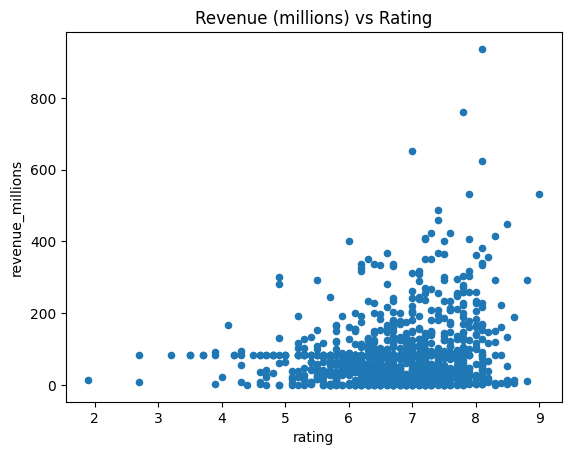

In [75]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating')

If we want to plot a simple histogram based on a single column, we can call `plot()` on a column:

<Axes: title={'center': 'Rating'}, ylabel='Frequency'>

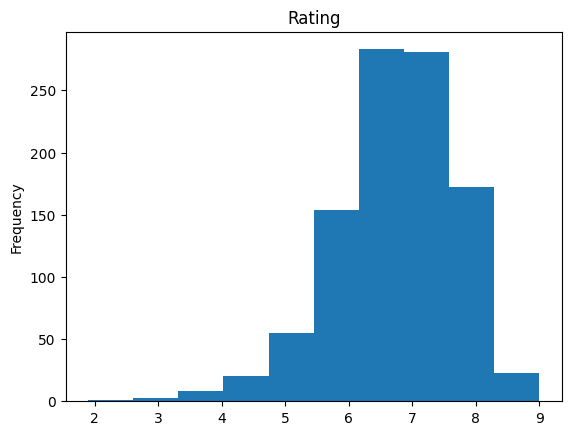

In [76]:
movies_df['rating'].plot(kind='hist', title='Rating')

Do you remember the `describe()` method at the beginning of this tutorial? Well, there's a graphical representation of the interquartile range, called the `Boxplot`. Let's recall what `describe()` gives us on the ratings column:


In [81]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

Using a `Boxplot` we can visualize this data. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

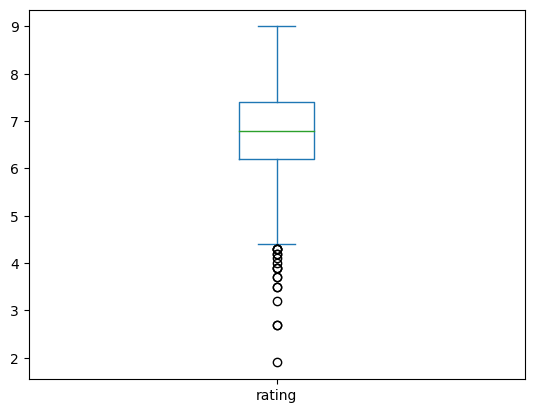

In [78]:
movies_df['rating'].plot(kind="box");

By combining categorical and continuous data, we can create a `Boxplot` of revenue that is grouped by the rating category we created above:

In [ ]:
movies_df.boxplot(column='revenue_millions', by='rating_category');

That's the general idea of plotting with Pandas. There's too many plots to mention, so definitely take a look at the [`plot()` docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) for more information on what it can do.

## Conclusions

Exploring, cleaning, transforming, and visualization data with Pandas in Python is an essential skill in data science. Just cleaning wrangling data is 80% of your job as a Data Scientist. After a few projects and some practice, you should be very comfortable with most of the basics.

To keep improving, view the [extensive tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html) offered by the official Pandas docs.